In [1]:
#Imorts
import numpy as numpy
import pandas as pandas
import seaborn as seaborn
import matplotlib
import matplotlib.pyplot as pyplot
#Pyplot has pre-defined styles, think of it as presentation default themes (like in powerpoint: changing style here)
pyplot.style.use('tableau-colorblind10')
#You can use the follow to see all the other styles // print(pyplot.style.available)

%matplotlib inline
matplotlib.rcParams['figure.figsize'] =(12,8)

In [2]:
# read from the csv file, and drop null values (.dropna())
dataset = pandas.read_csv(r'C:\Users\Lord\Desktop\Data Analyst Portfolio Projects\Call Center Data.csv').dropna()

In [3]:
# check the data look correct by either saying the varaibles name you've stored it into, or by using the head method 
# // dataset
dataset.head()


,Index,Incoming_Calls,Answered_Calls,Answer_Rate,Abandoned_Calls,Answer_Speed_(AVG),Talk_Duration_(AVG),Waiting_Time_(AVG),Service_Level_(20 Seconds)
0,1,217,204,94.01%,13,00:00:17,00:02:14,00:02:45,76.28%
1,2,200,182,91.00%,18,00:00:20,00:02:22,00:06:55,72.73%
2,3,216,198,91.67%,18,00:00:18,00:02:38,00:03:50,74.30%
3,4,155,145,93.55%,10,00:00:15,00:02:29,00:03:12,79.61%
4,5,37,37,100.00%,0,00:00:03,00:02:06,00:00:35,97.30%


In [4]:
# check the shape ( rows , columns) of data
dataset.shape

(1251, 9)

In [5]:
# You can check the data, with info, which will show you the non-null count (i.e. what's missing and what isn't)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1251 entries, 0 to 1250
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Index                       1251 non-null   int64 
 1   Incoming_Calls              1251 non-null   int64 
 2   Answered_Calls              1251 non-null   int64 
 3   Answer_Rate                 1251 non-null   object
 4   Abandoned_Calls             1251 non-null   int64 
 5   Answer_Speed_(AVG)          1251 non-null   object
 6   Talk_Duration_(AVG)         1251 non-null   object
 7   Waiting_Time_(AVG)          1251 non-null   object
 8   Service_Level_(20 Seconds)  1251 non-null   object
dtypes: int64(4), object(5)
memory usage: 97.7+ KB


In [6]:
# Or, you can manually inspeact the data for missing values with a for loop
for col in dataset.columns:
    missing_perc = numpy.mean(dataset[col].isnull())
    print('{} - {}%'.format(col,missing_perc))

Index - 0.0%
Incoming_Calls - 0.0%
Answered_Calls - 0.0%
Answer_Rate - 0.0%
Abandoned_Calls - 0.0%
Answer_Speed_(AVG) - 0.0%
Talk_Duration_(AVG) - 0.0%
Waiting_Time_(AVG) - 0.0%
Service_Level_(20 Seconds) - 0.0%


In [7]:
# In the same was 'info()' allows us to quickly get an overview 
# 'describe()' allows us to do that for max, min, average (mean) etc 
dataset.describe()

,Index,Incoming_Calls,Answered_Calls,Abandoned_Calls
count,1251.000000,1251.000000,1251.000000,1251.000000
mean,626.000000,198.539568,176.845723,21.693845
std,361.276902,156.534195,115.612080,59.671955
min,1.000000,5.000000,5.000000,0.000000
25%,313.500000,123.000000,114.000000,3.000000
50%,626.000000,177.000000,166.000000,8.000000
75%,938.500000,233.000000,214.500000,16.000000
max,1251.000000,1575.000000,909.000000,704.000000


In [8]:
# Look at the data types in each column
dataset.dtypes

Index                          int64
Incoming_Calls                 int64
Answered_Calls                 int64
Answer_Rate                   object
Abandoned_Calls                int64
Answer_Speed_(AVG)            object
Talk_Duration_(AVG)           object
Waiting_Time_(AVG)            object
Service_Level_(20 Seconds)    object
dtype: object

<AxesSubplot:xlabel='Incoming_Calls'>

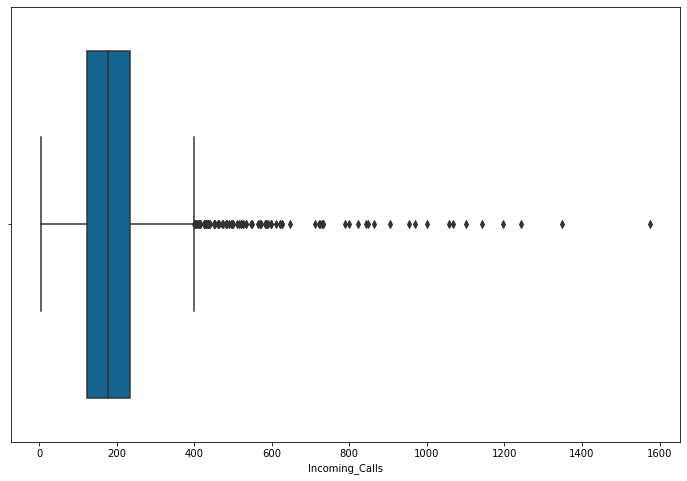

In [9]:
# We can plot a bot plox for each column the get an idea of the percentiles

seaborn.boxplot(x=dataset['Incoming_Calls'])

In [10]:
#creat a variable to hold dataset converted to cat codes for the heatmap plot

catConvertedDataset = dataset

for col in dataset.columns:
    if catConvertedDataset[col].dtypes not in('int64','float64'):
        catConvertedDataset[col] = catConvertedDataset[col].astype('category')
        catConvertedDataset[col] = catConvertedDataset[col].cat.codes
        

In [11]:
#check the catConvertedDataset column types
dataset.dtypes

Index                         int64
Incoming_Calls                int64
Answered_Calls                int64
Answer_Rate                   int16
Abandoned_Calls               int64
Answer_Speed_(AVG)             int8
Talk_Duration_(AVG)           int16
Waiting_Time_(AVG)            int16
Service_Level_(20 Seconds)    int16
dtype: object

In [12]:
# check the catConvertedDataset head 
catConvertedDataset.head()

,Index,Incoming_Calls,Answered_Calls,Answer_Rate,Abandoned_Calls,Answer_Speed_(AVG),Talk_Duration_(AVG),Waiting_Time_(AVG),Service_Level_(20 Seconds)
0,1,217,204,400,13,15,35,127,591
1,2,200,182,259,18,18,43,318,514
2,3,216,198,285,18,16,59,188,549
3,4,155,145,378,10,13,50,153,669
4,5,37,37,0,0,1,27,10,1010


In [13]:
#create a correlation matrix from the catConvertedDataset, and store it in a variable
seabornHeatmapData = catConvertedDataset.corr(method='pearson')

<AxesSubplot:>

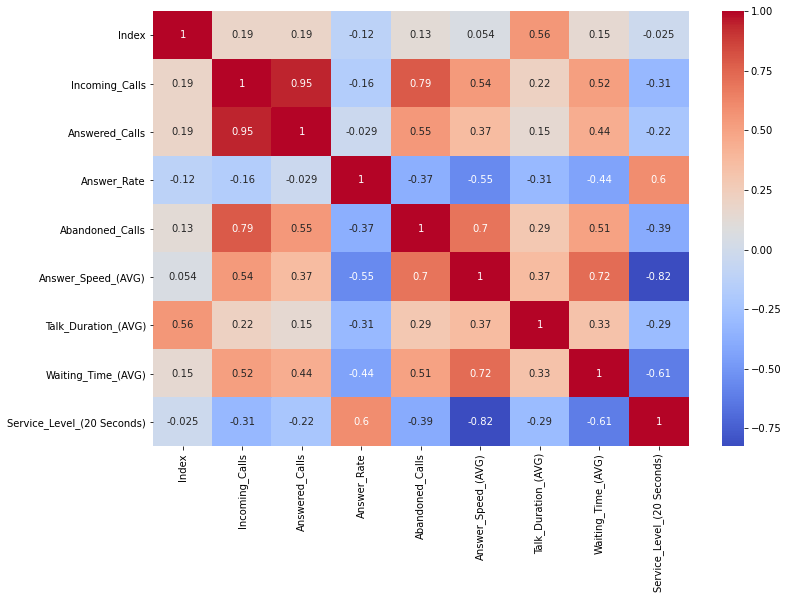

In [14]:
#Use Seaborns heatmap function to create a heatmap: data ,  annotions , colormap. Find more info in documentation. 
seaborn.heatmap(seabornHeatmapData, annot=True, cmap="coolwarm")

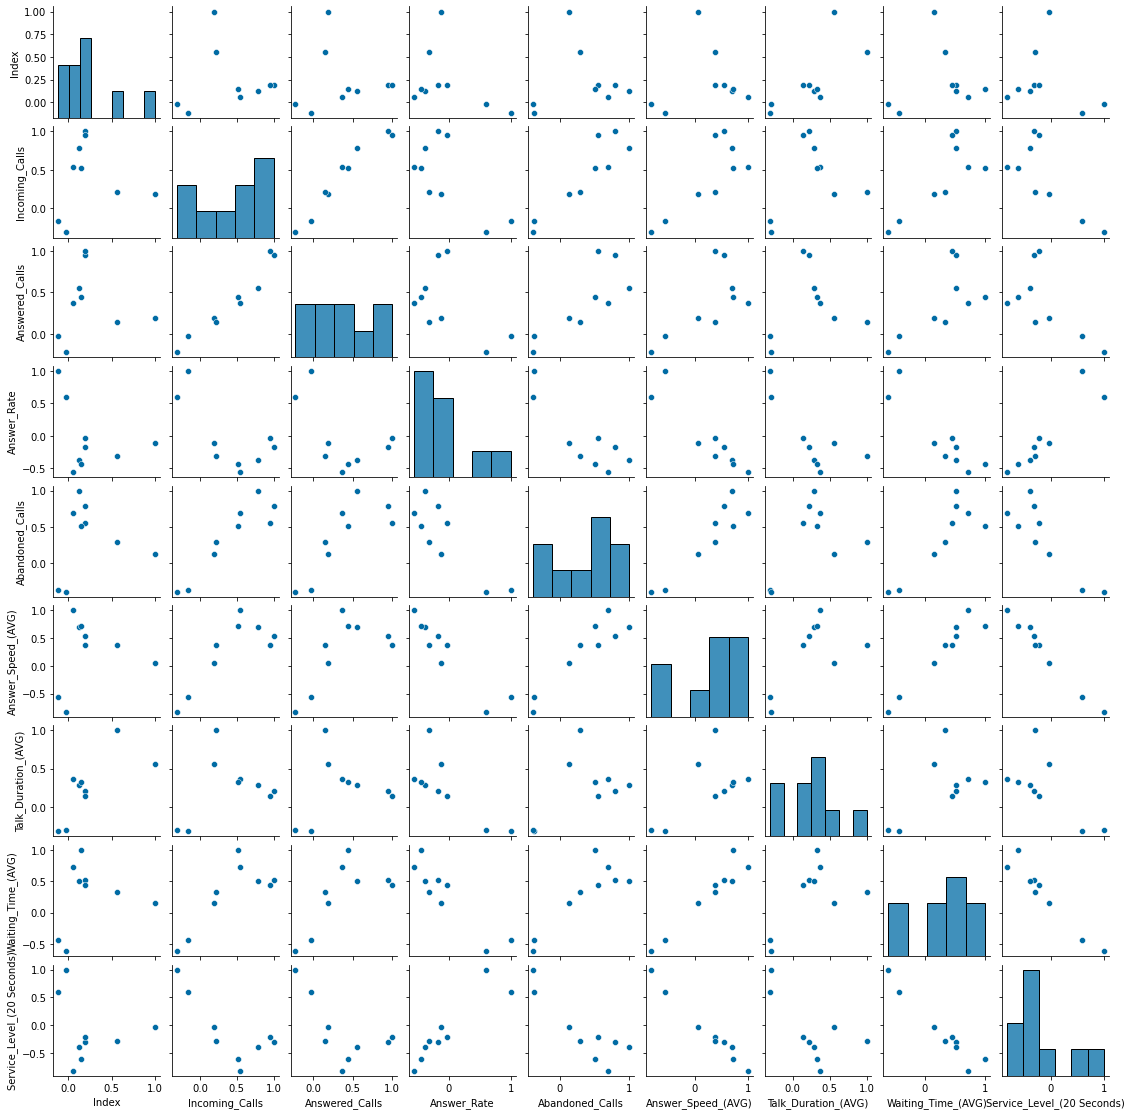

In [15]:
# To make drawing conclusion in relation to  correlations easier, a pairplot  can be used: Data, Height
seaborn.pairplot(seabornHeatmapData,height=1.75)

In [74]:
# This pair plot gives me an idea of the relations but nothing definitive between pairs
# I want to compare specific columns

# Copy the columns needed into a new dataset
incomingCalls_AnsweredCalls = dataset[['Incoming_Calls','Answered_Calls']]
# Note that a column, is an array, inside the dataset array: so above = dataSetArray[] + ['ColumnXArray','ColumnYArray'] 
# The copy method can also be appended if you'd like. // this = dataset[['Incoming Calls','Answered Calls']].copy()




<ipython-input-74-30ac33e61cfa>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incomingCalls_AnsweredCalls['perc'] = ((y/x)*100)-100


,Incoming_Calls,Answered_Calls,perc
0,217,204,-5.990783
1,200,182,-9.000000
2,216,198,-8.333333
3,155,145,-6.451613
4,37,37,0.000000


In [80]:
# create pecentage difference column
x = incomingCalls_AnsweredCalls['Incoming_Calls']
y = incomingCalls_AnsweredCalls['Answered_Calls']

incomingCalls_AnsweredCalls['perc'] = ((y/x)*100)-100



<ipython-input-80-ccfbc37e75bf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incomingCalls_AnsweredCalls['perc'] = ((y/x)*100)-100


In [81]:
# Check it works
incomingCalls_AnsweredCalls['perc'].head()

incomingCalls_AnsweredCalls.head()

,Incoming_Calls,Answered_Calls,perc
0,217,204,-5.990783
1,200,182,-9.000000
2,216,198,-8.333333
3,155,145,-6.451613
4,37,37,0.000000


In [83]:
# If I wanted to filter Columns Based On Criteria , i'd do the following ...
incCalls_AnsCalls_100 = incomingCalls_AnsweredCalls[incomingCalls_AnsweredCalls['Incoming_Calls'] >= 1]
incCalls_AnsCalls_100 = incomingCalls_AnsweredCalls[incomingCalls_AnsweredCalls['Incoming_Calls'] <= 100]

incCalls_AnsCalls_1to200 = incomingCalls_AnsweredCalls[incomingCalls_AnsweredCalls['Incoming_Calls'] >= 101]
incCalls_AnsCalls_1to200 = incomingCalls_AnsweredCalls[incomingCalls_AnsweredCalls['Incoming_Calls'] <= 200]

incCalls_AnsCalls_200plus = incomingCalls_AnsweredCalls[incomingCalls_AnsweredCalls['Incoming_Calls'] >= 201]

# ... because I want to see if the percentage of calls missed (perc) varies between brackets
print(incCalls_AnsCalls_100['Incoming_Calls'].mean(),' had ', incCalls_AnsCalls_100['perc'].mean(),'% Missed')
print(incCalls_AnsCalls_1to200['Incoming_Calls'].mean(),' had ', incCalls_AnsCalls_1to200['perc'].mean(),'% Missed')
print(incCalls_AnsCalls_200plus['Incoming_Calls'].mean(),' had ', incCalls_AnsCalls_200plus['perc'].mean(),'% Missed')

43.62645914396887  had  -5.015750913107722 % Missed
121.48976982097187  had  -5.6668994544671545 % Missed
327.01066098081026  had  -10.043418704718638 % Missed


In [77]:
# Done